# 线性规划    
linear programming，直译为“线性规划”。  
它涉及到在一系列线性约束条件下，对一个线性目标函数进行最大化或最小化的优化方法。

## linprog求解  
是scipy.optimize模块 的一个函数，集中了求解线性规划的常用算法      
linprog(c,A,b,Aeq,beq,bounds=None,method='simplex)      
参数：   
c为目标函数的系数；   
A，b对应不等号约束；   
Aeq，beq’对应等号约束；   
bounds是变量的界限；   
method是选择的算法，默认为simplex；  

方法：    
linprog.x 求得的最优解；  
linprog.fun 目标函数的最优值   
  

In [3]:
# 例5.1
from scipy.optimize import linprog
c = [-1, 4]  # c数组定义了目标函数的系数。目标函数可以表示为-x1 + 4x2。线性规划的目标是最小化这个目标函数。
A = [[-3,1],[1,2]]   
b = [6,4] # A和b定义了线性约束条件：-3x1 + x2 ≤ 6； x1 + 2x2 ≤ 4
bounds = ((None,None),(-3,None))  # bounds参数定义了变量x1和x2的取值范围
res = linprog(c,A,b,None,None,bounds)
print('目标函数的最小值：',res.fun)  # res.fun包含了目标函数的最小值
print('最优解为：',res.x)  # res.x包含了对应的变量值，即最优解

目标函数的最小值： -22.0
最优解为： [10. -3.]


In [6]:
# 例5.2
from scipy.optimize import linprog 
c = [-1,2,3]
A = [[-2,1,1],[3,-1,-2]];b = [9,-4]
Aeq = [[4,-2,-1]]; beq = [-6]
LB = [-10,0,None]   # (lowre bound)定义了变量的下界，即x1的下界为-10，x2的下界为0，x3没有下界。
UB = [None] * len(c) # (upper bound)定义了变量的上界，本处所有变量的上界都是无限的。
bounds = tuple(zip(LB,UB)) # zip(LB, UB)的结果会是一个由元组组成的序列：[(-10, None), (0, None), (None, None)]
res = linprog(c,A,b,Aeq,beq,bounds)
print('目标函数的最小值：',res.fun)
print('最优解：',res.x)

目标函数的最小值： 0.399999999999999
最优解： [-1.6  0.  -0.4]


In [18]:
# 例题5.3
from scipy.optimize import linprog
import numpy as np
c = [110,120,130,110,115,-150]
A = [[1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0], [8.8, 6.1, 2.0, 4.2, 5.0, -6], [-8.8, -6.1, -2.0, -4.2, -5.0, 3]]
b = [[200],[250],[0],[0]]
Aeq = [[1,1,1,1,1,-1]]
beq = [0]
bounds = [[0,None]] * len(c)
res = linprog(c,A,b,Aeq,beq,bounds)
print('目标函数的最小值：',res.fun)
print('最优解：',res.x)


目标函数的最小值： -17592.592592592595
最优解： [159.25925926  40.74074074   0.         250.           0.
 450.        ]


## cvxopt.solves模块求解


In [19]:
# 例5.4
import numpy as np
from cvxopt import matrix,solvers
# 在cvxopt中使用时，最好将所有数值类型明确为浮点数
c = matrix([-4.0, -5.0], (2, 1))  # 按照 cvxopt 的要求,每行表示一个未知量
A = matrix([[2.0,1.0],[1.0,2.0],[-1.0,0.0],[0.0,-1.0]]).T  # 按照 cvxopt 的要求，需要的格式是每一行对应一个约束条件，每一列对应一个变量。
b = matrix([3.0,3.0,0.,0.0])
sol = solvers.lp(c,A,b)
print('最优解为：\n',sol['x'])
print('最优值为：',sol['primal objective'])


     pcost       dcost       gap    pres   dres   k/t
 0: -8.1000e+00 -1.8300e+01  4e+00  0e+00  8e-01  1e+00
 1: -8.8055e+00 -9.4357e+00  2e-01  2e-16  4e-02  3e-02
 2: -8.9981e+00 -9.0049e+00  2e-03  6e-16  5e-04  4e-04
 3: -9.0000e+00 -9.0000e+00  2e-05  2e-16  5e-06  4e-06
 4: -9.0000e+00 -9.0000e+00  2e-07  1e-16  5e-08  4e-08
Optimal solution found.
最优解为：
 [ 1.00e+00]
[ 1.00e+00]

最优值为： -8.99999981140672


In [23]:
# 例5.5
import numpy 
from cvxopt import matrix,solvers
c = matrix([2.,1],(2,1))
A = matrix([[-1.,1],[-1.,-1],[1.,-2],[0.,-1]]).T
b = matrix([1.,-2,4,0])
Aeq = matrix([1.,2],(1,2))
beq = matrix([3.5])
sol = solvers.lp(c,A,b,Aeq,beq)
print('最优解为：',sol['x'])
print('最优值为：',sol['primal objective'])


     pcost       dcost       gap    pres   dres   k/t
 0:  5.5556e+00  1.2222e+00  1e+01  0e+00  2e+00  1e+00
 1:  4.6038e+00  3.7995e+00  2e+00  2e-16  4e-01  2e-01
 2:  2.5229e+00  2.4639e+00  2e-01  3e-16  4e-02  4e-02
 3:  2.5002e+00  2.4997e+00  2e-03  6e-16  4e-04  4e-04
 4:  2.5000e+00  2.5000e+00  2e-05  1e-16  4e-06  4e-06
 5:  2.5000e+00  2.5000e+00  2e-07  3e-16  4e-08  4e-08
Optimal solution found.
最优解为： [ 5.00e-01]
[ 1.50e+00]

最优值为： 2.5000000246110465


## 用cvxpy求解   
对应于matlab中的cvx
convex optimization 凸优化

In [ ]:
# 例5.6
'''
xij 表示第i个仓库到第j个客户的商品数量;
cij 表示第i个仓库到第j个客户的单位运价;
dj 表示第j个客户的需求量;
ei 表示第i个仓库的存存量;
'''
import cvxpy as cp 
import numpy as np
import pandas as pd
# 读取文件
d1 = pd.read_excel("Pdata5_6.xlsx",header=None)
d2 = d1.values  # 将读取的数据转换为numpy数组。

c  = d2[:-1,:-1]   # 运输成本
d = d2[-1,:-1].reshape(1,-1) # 需求量
e = d2[:-1,-1].reshape(-1,1) # 存货量
x = cp.Variable((6,8)) # 定义一个变量x，其形状为6x8，表示从6个仓库到8个客户的运输量。
obj = cp.Minimize(cp.sum(cp.multiply(c,x))) # 构建目标函数
# 构造约束条件 'keepdims=True'用于指定在进行数组运算时是否保持原数组的维度
con =[cp.sum(x,axis=1,keepdims=True)<=e,  # 确保从每个仓库出发的商品总量不超过该仓库的存货量；
      cp.sum(x,axis=0,keepdims=True)==d,  #  确保送达每个客户的商品总量满足该客户的需求量；
      x>=0]  # 确保所有的运输量都是非负的。
# 构造模型 
prob = cp.Problem(obj,con) 
# 求解模型
prob.solve(solver='GLPK_MI',verbose=True)  # 求解器：GLPK_MI，它是一个用于求解混合整数线性规划问题的求解器 'verbose=True'表示在求解过程中会输出求解信息
print('最优值为：',prob.value)
print('最优解为：',x.value)


# 灵敏度分析

In [20]:
# 例5.7(1)
from scipy.optimize import linprog
c = [-72,-63]  # 目标向量
A = [[1,1],[12,8]]
b = [[50],[480]]
bounds = ((0,100/3.0),(0,None))
res = linprog(c,A,b,None,None,bounds,method='simplex',options={"disp":True}) # "disp": True时，它会在求解过程中打印出相关的信息，比如迭代过程、最终结果等，这对于调试和理解求解过程非常有帮助。
print("求解结果如下：",res)


Optimization terminated successfully.
         Current function value: -3330.000000
         Iterations: 4
求解结果如下：  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -3330.0
       x: [ 2.000e+01  3.000e+01]
     nit: 4


C:\Users\L.Ling\AppData\Local\Temp\ipykernel_8116\1792360648.py:7: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c,A,b,None,None,bounds,method='simplex',options={"disp":True})


In [24]:
# 例5.7(2)  修改利润
from scipy.optimize import linprog
c = [-90,-63]  # 目标向量
A = [[1,1],[12,8]]
b = [[50],[480]]
bounds = ((0,100/3.0),(0,None))
res = linprog(c,A,b,None,None,bounds,method='simplex',options={"disp":True}) # "disp": True时，它会在求解过程中打印出相关的信息，比如迭代过程、最终结果等，这对于调试和理解求解过程非常有帮助。
print("求解结果如下：",res)

Optimization terminated successfully.
         Current function value: -3690.000000
         Iterations: 4
求解结果如下：  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -3690.0
       x: [ 2.000e+01  3.000e+01]
     nit: 4


C:\Users\L.Ling\AppData\Local\Temp\ipykernel_8116\558791572.py:7: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c,A,b,None,None,bounds,method='simplex',options={"disp":True}) # "disp": True时，它会在求解过程中打印出相关的信息，比如迭代过程、最终结果等，这对于调试和理解求解过程非常有帮助。


# 投资的收益和风险

In [27]:
'''
符号规定：
si 表示第i中投资项目,其中s0表示存入银行
ri 表示si的平均收益率,收益为(ri*xi),其中r0=0.05
pi 表示si的交易费率,交易费为(pi*xi),其中p0=0
qi 表示si的风险损失率,风险损失费为(qi*xi),其中q0=0
xi 表示投资到项目si里的资金
a 表示投资者的风险度,即投资者愿意承担的最大损失为(a*M)

重要的基本假设：
投资数额M很大,且假设M=1
总体的投资风险用投资项目si中最大的一个风险来衡量(xi*qi)
各个资产之间是相互独立的
ri,pi,qi为定值
'''

'\n符号规定：\nsi 表示第i中投资项目,其中s0表示存入银行\nri 表示si的平均收益率\npi 表示si的交易费率,其中p0=0\nqi 表示si的风险损失率,其中q0=0\nxi 表示投资到项目si里的资金\na 表示投资者的风险度,即投资者愿意承担的最大损失为(a*M)\n\n重要的基本假设：\n投资数额M很大,且假设M=1\n总体的投资风险用投资项目si中最大的一个风险来衡量(xi*qi)\n各个资产之间是相互独立的\nri,pi,qi为定值\n'

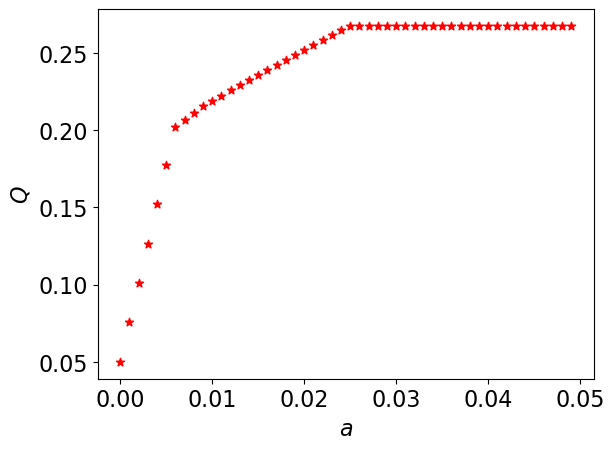

In [51]:
# 模型一
# 固定风险水平，优化收益
# 目标为 max（sum（ri-pi)xi）
# st为 qi*xi <= a*M; sum((1+pi)*xi) = M; xi >= 0

import matplotlib.pyplot as plt 
from numpy import ones, diag, c_, zeros
from scipy.optimize import linprog

c = [-0.05,-0.27,-0.19,-0.185,-0.185]
A = c_[zeros(4),diag([0.025,0.015,0.055,0.026])] # c_将两个数组沿着列方向进行拼接
Aeq = [[1,1.01,1.02,1.045,1.065]]
beq = [1]
a =0 
aa = []  # aa存储不同的风险水平值
ss = []  # ss存储对应的最优收益值
while a < 0.05:
    b = ones(4)*a
    res = linprog(c,A,b,Aeq,beq) # 边界条件默认为（0，None）
    x = res.x  # 从求解结果中提取最优投资组合x和最优值Q
    Q = -res.fun
    aa.append(a) # 把最优值都保存起来
    ss.append(Q) 
    a += 0.001

plt.rc('text',usetex=False) #关闭LaTeX渲染
plt.rc('font',size=16) #设置全局字体大小为16
plt.scatter(aa,ss,color='r',marker='*') # 等于 plt.plot(aa,ss,'r*')
plt.xlabel('$a$')
plt.ylabel('$Q$',rotation=90)
plt.show()

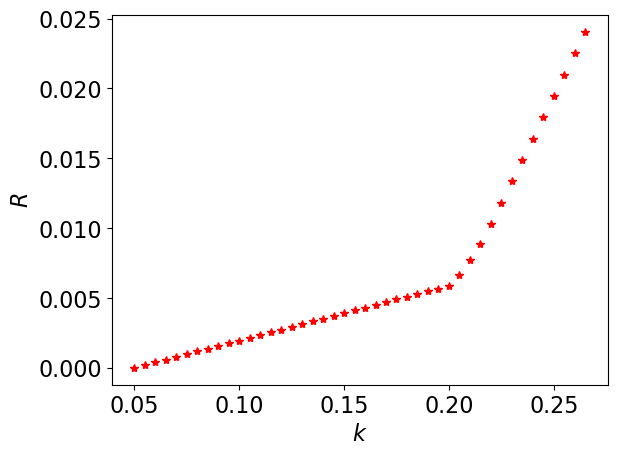

In [12]:
# 模型二
# 固定盈利水平，极小化风险

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

x = cp.Variable(6,pos=True)  # 'pos=True',表示所有元素都设置成非负
obj = cp.Minimize(x[5])
a1 = np.array([0.025,0.015,0.055,0.026])
a2 = np.array([0.05,0.27,0.19,0.185,0.185])
a3 = np.array([1,1.01,1.02,1.045,1.065])
k = 0.05
kk = []
ss = []
while k < 0.27:
    # 注意约束1和约束2、3的表达，实现不同的效果
    con = [cp.multiply(a1,x[1:5])-x[5] <= 0,  # a1和x[1:5]的元素逐个相乘后减去x[5]分别都必须小于等于0
           a2 @ x[:-1] >= k, # @运算符表示点积
           a3 @ x[:-1] == 1]
    prob = cp.Problem(obj,con)
    prob.solve(solver='GLPK_MI')
    kk.append(k)
    ss.append(prob.value)
    k += 0.005

plt.rc('font',size=16)
plt.plot(kk,ss,'r*')
plt.xlabel('$k$')
plt.ylabel('$R$',rotation=90)
plt.show()

In [61]:
# 模型三
# 对两个目标价进行加权求和，人为给出权重，并求出在此权重下的最优解和最优投资建议
# 注意模型三的真正解题结果在习题5.2，现在这段代码给出的是特殊情况（0.4和0.6的比例）
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt 

x = cp.Variable(6,pos=True)
a1 = np.array([-0.05,-0.2,-0.19,-0.185,-0.185]) # ri-pi 收益率-交易费用率
a11 = a1 * 0.6
a2 = np.array([0.025,0.015,0.055,0.026]) #  风险率
a3 = np.array([1,1.01,1.02,1.045,1.065]) # 1+pi 

obj = cp.Minimize(0.4 * x[5]+(a11 @ x[:-1]))  # 加号后面的(a11 @ x[:-1])代表的是负收益（因为a11是负值）;目标函数是损失和负收益最小
con = [cp.multiply(a2,x[1:5])-x[5] <= 0,
       a3 @ x[:-1] == 1]
prob = cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最优解：',-prob.value)
print('最优投资建议:',x.value)

最优解： 0.1107011070110701
最优投资建议: [0.         0.36900369 0.61500615 0.         0.         0.00922509]


In [39]:
# gpt-4 的回答
'''问题：
我需要你帮我编辑代码，对两个目标函数加权求和第一个目标是最小化风险（风险用最大的风险指代），第二个目标是最大化收益，
两个目标的权重分别是0.4和0.6。共有五种方案，第一种方案的风险和交易费为0，其余方案的数据如下：
a1 = np.array([-0.05,-0.2,-0.19,-0.185,-0.185]) #  收益率-交易费用率
a2 = np.array([0.025,0.015,0.055,0.026]) #  风险率
a3 = np.array([1,1.01,1.02,1.045,1.065]) # 1+交易费率
'''
import numpy as np

# 给定数据
a1 = np.array([-0.05,-0.2,-0.19,-0.185,-0.185]) # 收益率-交易费用率
a2 = np.array([0.025,0.015,0.055,0.026]) # 风险率
a3 = np.array([1,1.01,1.02,1.045,1.065]) # 1+交易费率

# 将第一种方案的风险和交易费用加入到数组中
# 第一种方案的风险为0，由于是最小值，我们将其余方案风险加入数组并在前面补上0
a2 = np.insert(a2, 0, 0)
# 第一种方案的交易费用率为0，收益率也视为0，已经在a1中反映

# 权重
w1, w2 = 0.4, 0.6

# 计算加权目标值
# 风险最大化（需要最小化，所以取负值）
# 收益最大化
# 注意：这里我们直接用a1表示收益率-交易费用率，因为a3表示的是1+交易费率，已经在计算a1时考虑了交易费用
weighted_scores = -w1 * a2 + w2 * a1

# 计算每种方案的加权目标值并找出最佳方案
best_scheme_index = np.argmax(weighted_scores)
best_scheme_value = weighted_scores[best_scheme_index]

weighted_scores, best_scheme_index, best_scheme_value
#结论：all in 银行
#选择第一种方案进行投资。这一方案在考虑到风险和收益后的加权目标值计算中表现最优，其风险最小且交易费用为0，尽管其收益率在计算中也被假定为0。
#这意味着第一种方案在风险控制方面做得很好，适合那些优先考虑风险最小化的投资者。


(array([-0.03  , -0.13  , -0.12  , -0.133 , -0.1214]), 0, -0.03)

In [43]:
# 习题5.1  
# 1)
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import linprog

c = np.array([-8,2,-3,1,2])
A = np.array([[1,1,1,1,1],[1,2,2,1,6],[2,1,6,0,0],[0,0,1,1,5]])
b = np.array([400,800,200,200])
bounds = ((0,99),(0,99),(0,99),(0,99),(-10,None))

res = linprog(c,A,b,None,None,bounds)
print('最优值：',-res.fun)
print('最优解：',res.x)

最优值： 813.0
最优解： [ 99.           0.           0.33333333   0.         -10.        ]


In [49]:
# 习题5.2
# 2)
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

x = cp.Variable((5,1),pos=True) # 注意这里x要设置为5行一列的二维数组，不能是一维数组
a1=np.array([[1,1,1,1,1],[1,2,2,1,6],[2,1,6,0,0],[0,0,1,1,5]])
a2=np.array([[400],[800],[200],[200]])

obj = cp.Maximize(a @ x)
con =[a1 @ x <= a2,
      x[:-1]>= 0,
      x[:-1]<= 99,
      x[-1] >= -10]

prob = cp.Problem(obj,con)
prob.solve()
print('最优值为：',prob.value)
print('最优解为：',x.value)


最优值为： 792.9999996831621
最优解为： [[9.90000000e+01]
 [7.96836183e-08]
 [3.33333272e-01]
 [8.95131345e-08]
 [5.85678214e-09]]


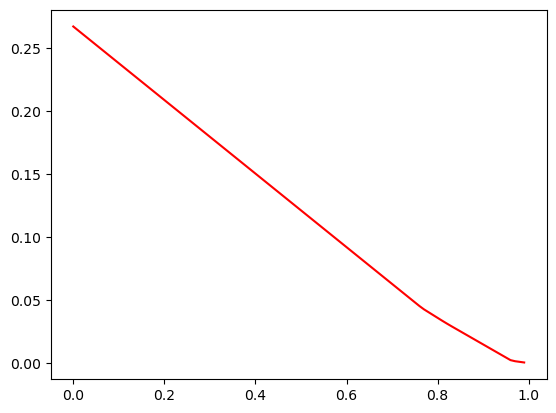

In [2]:
# 习题5.3
# 不同权重比例下，投资组合的最大预期收益
import cvxpy as cp
import numpy as np
from matplotlib.pyplot import *

x=cp.Variable(6)
a1=np.array([0.025,0.015,0.055,0.026])
a2=np.array([0.05,0.27,0.19,0.185,0.185])
a3=np.array([1,1.01,1.02,1.045,1.065])
con=[cp.multiply(a1,x[1:5])-x[5]<=0,a3@x[:-1]==1,x>=0]
s=0;ss=[];aa=[]
while s<=1:
    obj=cp.Minimize(s*x[-1]-(1-s)*a2@x[:-1])
    prob=cp.Problem(obj,con)
    prob.solve(solver='GLPK_MI')
    ss.append(s);aa.append(-prob.value)
    s=s+0.01

plot(ss,aa,'r')
show()

# 理解图形：Y值越高（即绝对值越大的负数），表示在考虑特定权重比例下，投资组合的预期收益越大。

In [8]:
# 习题5.3 gpt4回答
# 这个问题是一个标准的二次规划问题（因为目标函数是变量的二次函数），可以使用适用于二次规划的优化库来求解，如cvxpy。
import cvxpy as cp
import numpy as np

# 预期收益率
r = np.array([20, 42, 100, 50, 46, 30])

# 协方差矩阵
cov = np.array([[0.032, 0.005, 0.03, -0.031, -0.027, 0.01],
                [0.005, 0.1, 0.085, -0.07, -0.05, 0.02],
                [0.03, 0.085, 0.333, -0.11, -0.02, 0.042],
                [-0.031, -0.07, -0.11, 0.125, 0.05, -0.06],
                [-0.027, -0.05, -0.02, 0.05, 0.065, -0.02],
                [0.01, 0.02, 0.042, -0.06, -0.02, 0.08]])

# 投资比例向量
x = cp.Variable(6)

# 目标函数：最小化投资组合风险（方差）
objective = cp.Minimize(cp.quad_form(x, cov))

# 约束条件
con = [r @ x >= 25,  # 预期收益率至少为25%
               cp.sum(x) == 1,  # 投资比例和为1
               x >= 0]  # 非负约束

# 问题定义和求解
prob = cp.Problem(objective, con)
prob.solve()

print("最优投资比例为:", x.value)
print("最小风险（方差）为:", prob.value)


最优投资比例为: [ 3.17716540e-01  1.98843330e-01 -1.86161081e-21  1.68350925e-01
  2.08999264e-01  1.06089942e-01]
最小风险（方差）为: 0.0013601865319733107


In [12]:
# 习题5.3 网上的答案 1） 
#在这个模型中，风险似乎是通过一个单独的变量x[6]来度量的，而这个度量是通过其他投资比例的线性函数来限制的。这可能意味着x[6]代表了投资组合中单个资产可能带来的最大损失。
#cvxpy
import cvxpy as cp
import numpy as np
x=cp.Variable(7)
a1=np.array([1,1,1,1,1,1])
a2=np.array([20,42,100,50,46,30])
a3=np.array([0.032,0.1,0.333,0.125,0.065,0.08])
obj=cp.Minimize(x[6])
con=[cp.multiply(x[:6],a3)-x[6]<=0,a1@x[:-1]==1,a2@x[:-1]>=25,x[:-1]>=0,x[:-1]<=1,x[-1]>=0]
prob=cp.Problem(obj,con)
prob.solve(solver='GLPK_MI')
print('最小风险：',prob.value)
print("最优投资比例为:", x.value)

最小风险： 0.01247853405329681
最优投资比例为: [0.38995419 0.12478534 0.03747308 0.09982827 0.19197745 0.15598168
 0.01247853]


In [5]:
# 习题5.3 网上的答案 2）
#在这个模型中，风险似乎是通过一个单独的变量x[6]来度量的，而这个度量是通过其他投资比例的线性函数来限制的。这可能意味着x[6]代表了投资组合中单个资产可能带来的最大损失。
#linprog
from scipy.optimize import *
c=[0,0,0,0,0,0,1]
A=[[-20,-42,-100,-50,-46,-30,0],
   [0.032,0,0,0,0,0,-1],
   [0,0.1,0,0,0,0,-1],
   [0,0,0.333,0,0,0,-1],
   [0,0,0,0.125,0,0,-1], 
   [0,0,0,0,0.065,0,-1],
   [0,0,0,0,0,0.08,-1]]
b=[25,0,0,0,0,0,0]
Aeq=[[1,1,1,1,1,1,0]]
beq=[1]
bound=((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,None))
res=linprog(c,A,b,Aeq,beq,bound)
print("最小风险:",res.fun)
print("最优投资比例为:", res.x)

最小风险: 0.012478534053296802
最优投资比例为: [0.38995419 0.12478534 0.03747308 0.09982827 0.19197745 0.15598168
 0.01247853]


In [27]:
# 习题5.4
import numpy as np
import cvxpy as cp

# x表示第i种糖果的第j种原料的用料
x = cp.Variable(9,pos=True)
c = [(3.4-0.5-2),(2.85-0.4-2),(2.25-0.3-2),(3.4-0.5-1.5),(2.85-0.4-1.5),(2.25-0.3-1.5),(3.4-0.5-1),(2.85-0.4-1),(2.25-0.3-1)] 
obj = cp.Maximize(c @ x[:])
con = [x[0] >= 0.6*(x[0]+x[3]+x[6]),
       x[6] <= 0.2*(x[0]+x[3]+x[6]),
       x[1] >= 0.3*(x[1]+x[4]+x[7]),
       x[7] <= 0.5*(x[1]+x[4]+x[7]),
       x[8] <= 0.6*(x[2]+x[5]+x[8]),
       sum(x[0:3])<=2000,
       sum(x[3:6])<=2500,
       sum(x[6:])<=1200,
       ]
prob = cp.Problem(obj,con)
prob.solve()
print(x.value)
x_value = x.value.reshape(3,3)
x_values = np.sum(x_value,axis=0) 
x_values_rounded = np.round(x_values)
print('四舍五入后的最优解：', x_values_rounded)
print('最大利润：',prob.value)


[5.80000005e+02 1.41999999e+03 1.97138755e-07 2.78762854e+02
 2.22123714e+03 1.87014904e-06 1.07903816e+02 1.09209618e+03
 1.48099703e-06]
四舍五入后的最优解： [ 967. 4733.    0.]
最大利润： 5449.999994354001


In [12]:
#linprog
from scipy.optimize import *
import numpy as np
c=[-0.9,-0.45,0.05,-1.4,-0.95,-0.45,-1.9,-1.45,-0.95]
A=[[-0.4,0,0,0.6,0,0,0.6,0,0],[0,-0.7,0,0,0.3,0,0,0.3,0],[-0.2,0,0,-0.2,0,0,0.8,0,0],[0,-0.5,0,0,-0.5,0,0,0.5,0],
   [0,0,-0.6,0,0,-0.6,0,0,0.4],[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,1,1,1]]
b=[0,0,0,0,0,2000,2500,1200]
bound=((0,2000),(0,2000),(0,2000),(0,2500),(0,2500),(0,2500),(0,1200),(0,1200),(0,1200))
res=linprog(c,A,b,None,None,bound)
a=np.array(np.reshape(res.x,(3,3)))
print("应生产糖果\n甲:%.0f千克"%(a[0,0]+a[1,0]+a[2,0]))
print("乙:%.0f千克"%(a[0,1]+a[1,1]+a[2,1]))
print("丙:%.0f千克"%(a[0,2]+a[1,2]+a[2,2]))
print(res.fun)

应生产糖果
甲:967千克
乙:4733千克
丙:0千克
-5450.0


In [62]:
# 习题5.5 多目标线性规划->单目标线性规划
# 设定利润最低为1000
#linprog
from scipy.optimize import linprog
c=[0,0,3,2]
A=[[-1,-1,0,0],[0,0,-1,-1],[3,0,2,0],[0,3,0,2],[-100,-90,-80,-70]]
b=[[-30],[-30],[120],[48],[-1000]]
LB=[0]*len(c)
UB=[None]*len(c)
bound=tuple(zip(LB,UB))
res=linprog(c,A,b,None,None,bound)
print("目标函数的最小解:",res.fun)
print("最优解为:",res.x)


目标函数的最小解: 66.0
最优解为: [30.  0.  6. 24.]
